---

# Gradient Descent

## Introduction

In mathematics gradient descent (also often called steepest descent) is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. The idea is to take repeated steps in the opposite direction of the gradient (or approximate gradient) of the function at the current point, because this is the direction of steepest descent. Conversely, stepping in the direction of the gradient will lead to a local maximum of that function; the procedure is then known as gradient ascent.

Gradient descent is generally attributed to Cauchy, who first suggested it in 1847. Hadamard independently proposed a similar method in 1907. Its convergence properties for non-linear optimization problems were first studied by Haskell Curry in 1944, with the method becoming increasingly well-studied and used in the following decades.

## Function requirements
2 Requirements:
- The function must be differentiable, has a derivative for each point in its domain.
* The funcion must be convex. 

1. If a function is differentiable it has a derivative for each point in its domain — not all functions meet these criteria. Some examples of functions meeting this criterion:

<p align="center">
    <img src="gradient descent1.png" width="800">
</p>

Typical non-differentiable functions have a step a cusp or a discontinuity:
<p align="center">
    <img src="gradient descent2.png" width="800">
</p>


2. Next requirement — function has to be convex. For a univariate function, this means that the line segment connecting two function’s points lays on or above its curve (it does not cross it). If it does it means that it has a local minimum which is not a global one.Below there are two functions with exemplary section lines:

<p align="center">
    <img src="gradient descent3.png" width="700">
</p>

Another way to check mathematically if a univariate function is convex is to calculate the second derivative and check if its value is always bigger than 0.

---

## Minimizing a Single Variable Function
Define a simple function of one variable

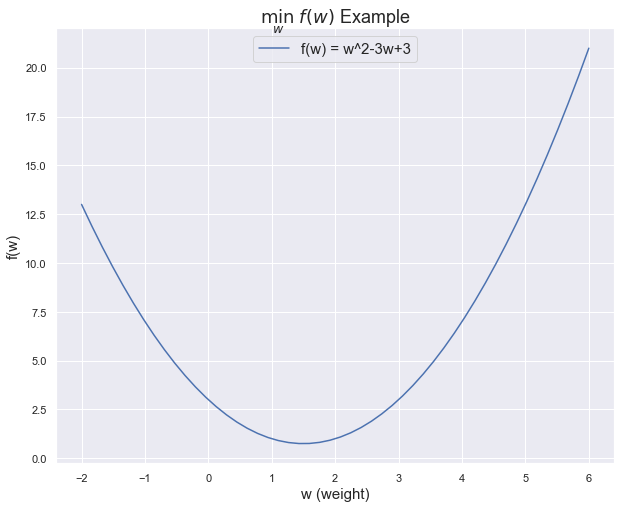

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set Seaborn theme for plots
sns.set_theme()

# Define test function for experimenting
def f(w):
    return w**2 -3*w +3

# Define domain variables for plotting f
domain = np.linspace(-2, 6, 50)

# Plot the function f(w)
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "f(w) = w^2-3w+3")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(w)$ Example", fontsize = 18)
plt.show()

---

Suppose we first guess that the minimum value of $f(w)$ occurs at $w_0 = 3$. We can visualize the point $(3, f(3))$ by running the following code in the cell below. 

---

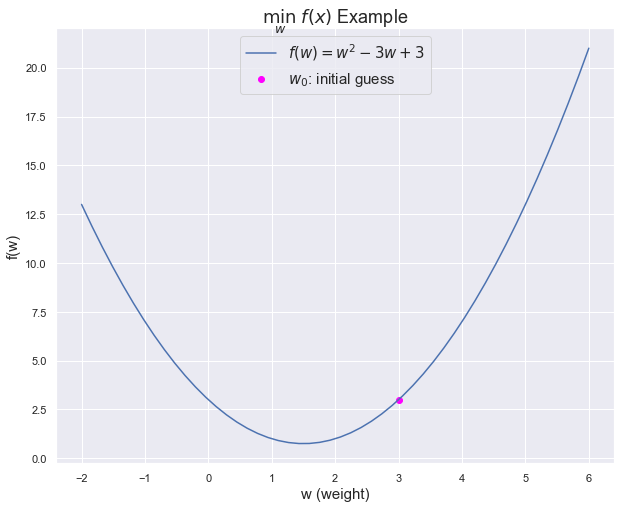

In [2]:
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = w^2-3w+3$")
plt.scatter([3], [f(3)], color = "magenta", label = "$w_0$: initial guess")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$ Example", fontsize = 18)
plt.show()

/var/folders/cz/s1z_zqxx41z81cc1h7vwxlnh0000gn/T/ipykernel_7514/2663024901.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "C1--" (-> color=(0.8666666666666667, 0.5176470588235295, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(wrange,


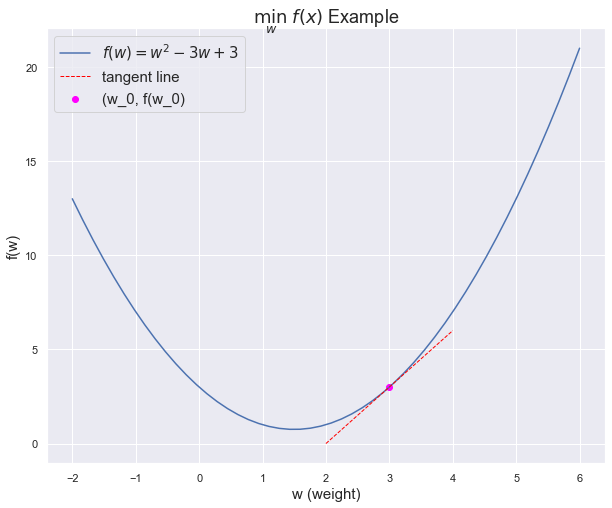

In [3]:
# Define parabola derivative
def df(w): 
    return 2*w - 3

# Choose w_0
w_0 = 3.0

# Define tangent line function for visualization
def tangent_line(w_i, function, derivative, i = 0, color = "magenta", show = True):
    # Define tangent line
    # y = m*(x - x1) + y1
    def line(w):
        return derivative(w_i)*(w - w_i) + function(w_i)

    wrange = np.linspace(w_i - 1, w_i + 1, 10)
    if show:
        plt.plot(wrange,
            line(wrange), 
            'C1--', 
            linewidth = 1, 
            color = "red", 
            label = "tangent line")
    plt.scatter([w_i], [function(w_i)], color = color, label = f"(w_{i}, f(w_{i})")

# Plot the figure
plt.figure(figsize = (10, 8))
# Plot the function
plt.plot(domain, f(domain), label = "$f(w) = w^2-3w+3$")
# Visualize the tangent line
tangent_line(w_0, f, df)

# Label the figure
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("$\min_w$ $f(x)$ Example", fontsize = 18)
plt.show()

w_0 = 3.0
w_1 = 0.5999999999999996


/var/folders/cz/s1z_zqxx41z81cc1h7vwxlnh0000gn/T/ipykernel_7514/2663024901.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "C1--" (-> color=(0.8666666666666667, 0.5176470588235295, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(wrange,


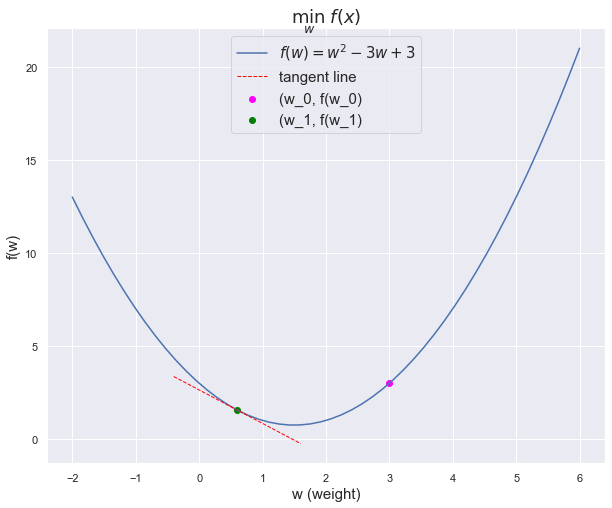

In [4]:
# Initialize choice of w
w_0 = 3.0

# Set learning rate 
alpha = .8

# Moving in the opposite direction of the derivative at w_0
w_1 = w_0 - alpha*df(w_0)

# Print the sequence of w variables
print(f"{w_0 = }")
print(f"{w_1 = }")

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = w^2-3w+3$")

# Visualize the tangent lines
tangent_line(w_0, f, df, show = False)
tangent_line(w_1, f, df, i = 1, color = "green")

# Plot labels
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$", fontsize = 18)
plt.show()


w_0 = 3.0 | df(w_0) = 3.0
w_1 = 0.6 | df(w_1) = -1.8000000000000007
w_2 = 2.04 | df(w_2) = 1.08
w_3 = 1.18 | df(w_3) = -0.6480000000000001
w_4 = 1.69 | df(w_4) = 0.3887999999999998
w_5 = 1.38 | df(w_5) = -0.2332799999999997
w_6 = 1.57 | df(w_6) = 0.13996799999999965
w_7 = 1.46 | df(w_7) = -0.08398079999999997
w_8 = 1.53 | df(w_8) = 0.05038848000000007
w_9 = 1.48 | df(w_9) = -0.03023308800000013
w_10 = 1.51 | df(w_10) = 0.018139852800000078
w_11 = 1.49 | df(w_11) = -0.010883911680000136
w_12 = 1.5 | df(w_12) = 0.006530347008000259
w_13 = 1.5 | df(w_13) = -0.003918208204800155
w_14 = 1.5 | df(w_14) = 0.0023509249228799156
w_15 = 1.5 | df(w_15) = -0.0014105549537277717
w_16 = 1.5 | df(w_16) = 0.0008463329722365742



/var/folders/cz/s1z_zqxx41z81cc1h7vwxlnh0000gn/T/ipykernel_7514/2663024901.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "C1--" (-> color=(0.8666666666666667, 0.5176470588235295, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(wrange,


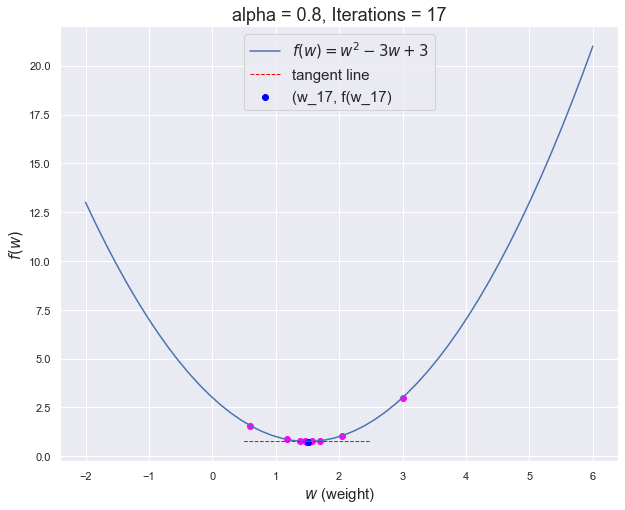

In [5]:
def derivative_descent(derivative, alpha = 0.8, w_0 = 3.0, max_iter = 1000):
    W = [w_0]
    i = 0
    while abs(derivative(W[-1])) > 0.001 and i < max_iter:
        w_new = W[-1] - alpha*df(W[-1])
        W.append(w_new)
        i += 1
    W = np.array(W)

    return W

W = derivative_descent(df)

for i, w in enumerate(W):
    print(f"w_{i} = {np.round(w, decimals = 2)} | df(w_{i}) = {df(w)}")
print("")


# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = w^2-3w+3$")
plt.scatter(W, f(W), color = "magenta")
tangent_line(W[-1], f, df, i = len(W), color = "blue")
plt.xlabel("$w$ (weight)", fontsize = 15)
plt.ylabel("$f(w)$", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title(f"alpha = {alpha}, Iterations = {len(W)}", fontsize = 18)
plt.show()


## The Learning Rate

- Too high learning rate leads to overshooting the minima and keeping bouncing.
* Too low learning rate leads to longer time for the training to reach the minima.

<p align="center">
    <img src="learning rate.png" width="700">
</p>

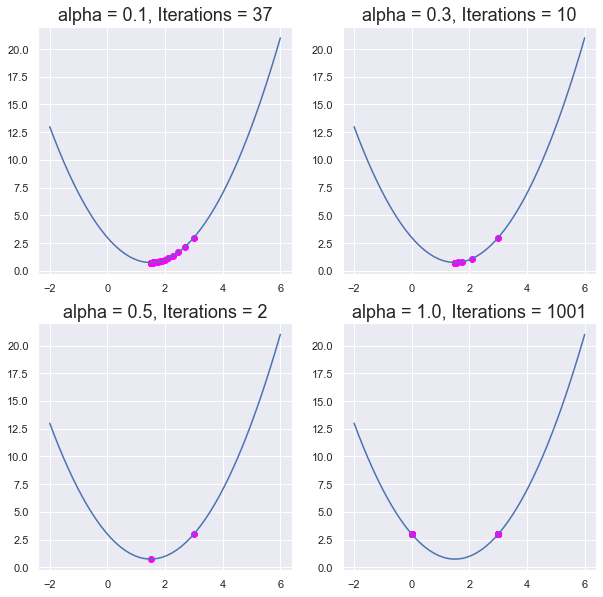

In [39]:
# Possible choices of learning rate 
alphas = [0.1, 0.3, 0.5, 1.0]

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    W = derivative_descent(df, alpha = alpha)
    ax.plot(domain, f(domain))
    ax.scatter(W, f(W), color = "magenta")
    ax.set_title(f"alpha = {alpha}, Iterations = {len(W)}", fontsize = 18)


## Finding the optimal learning rate
As we can see from the graphs above,
>when alpha=0.1, the learning rate is too low, reaching the minima but taking more times;

>when alpha=0.5, the learning rate higher than 0.1, taking a few less times to reach the minima.

>when alpha=0.5, the learning rate is optimal, model converges to the minimum.

>when alpha=1.0, the learning rate is too high, it overshoots without reaching the minuma, and if alpha is higher than 1.0, it possibly moves away from the minima, performance decreases on learning.

---

## Minimizing Functions of Several Variables

Gradient descent can now be defined in a meaningful sense:

$$
w \leftarrow w - \alpha \nabla f(w) \:\:\:\:\:\:\:\:\:\: (\text{True Gradient Descent})
$$

---

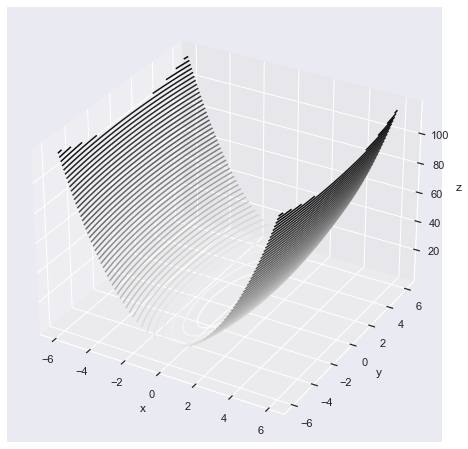

In [24]:
from mpl_toolkits import mplot3d

def f(w_0, w_1):
    return 3*w_0 ** 2 + 0.3*w_1 ** 2

x = np.linspace(-6, 6, 300)
y = np.linspace(-6, 6, 300)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

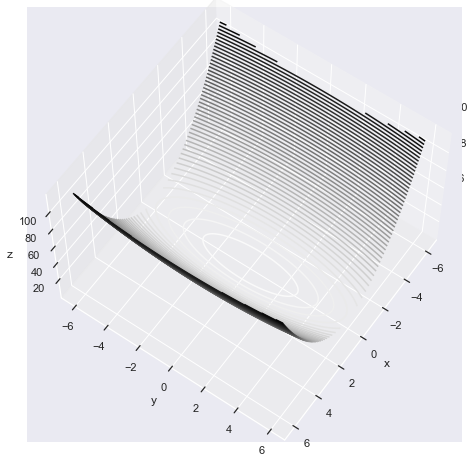

In [25]:
x = np.linspace(-6, 6, 300)
y = np.linspace(-6, 6, 300)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax.view_init(60, 35)
plt.show()

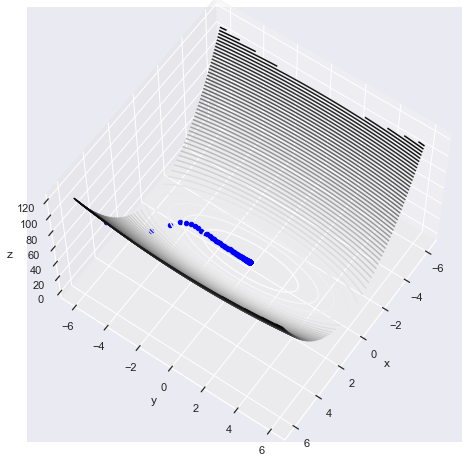

In [26]:
def df(w):
    grad = [6*w[0], 0.6*w[1]]
    return np.array(grad)

def gradient_descent(derivative, W, alpha = 0.8, max_iter = 1_000):
    i = 0
    W_hist = [W]
    while i < max_iter:
        W = W - alpha*df(W)
        i += 1
        W_hist.append(W)

    return W_hist

W = gradient_descent(df, np.array([5.0, -5.0]), alpha = 0.1, max_iter=500)

x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)


fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
for i in range(len(W)):
    ax.scatter3D([W[i][0]], 
                 [W[i][1]], 
                 [f(W[i][0], W[i][1])], color = "blue")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(60, 35)
plt.show()

## Reference

Gandhi, R. (2018, May 28). Introduction to machine learning algorithms: Linear regression. Medium. Retrieved May 6, 2022, from https://towardsdatascience.com/introduction-to-machine-learning-algorithms-linear-regression-14c4e325882a 

Kwiatkowski, R. (2021, May 24). Gradient descent algorithm - a deep dive. Medium. Retrieved May 6, 2022, from https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21 

Wikimedia Foundation. (2022, April 4). Gradient descent. Wikipedia. Retrieved May 6, 2022, from https://en.wikipedia.org/wiki/Gradient_descent 